## Comparisons to other methods (speed, accuracy)

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
X = np.loadtxt("Data/mnist2500_X.txt")
labels = np.loadtxt("Data/mnist2500_labels.txt")

### Our Package (Reference)

In [83]:
from tsne.tsne import TSNE, TSNE_plot

train1 = StandardScaler().fit_transform(X)
tsneout = PCA(n_components=50).fit_transform(train1)

yout = TSNE(tsneout)

ModuleNotFoundError: No module named 'tsne'

In [ ]:
our_plot = TSNE_plot(yout, labels)
our_plot.savefig("Report/Report_Plots/our_plot_MNIST.png")


In [ ]:
our_time = %timeit -o -r3 -n3 TSNE(tsneout)

### PCA

Popular linear dimensionality reduction methods include PCA, or Principal Components Analysis, and MDS, Multi-Dimensional Scaling. However, issues arise in applications where low-dimensional representations of similar points must be kept close together, because these methods prioritize keeping low-dimensional representations of dissimilar points far apart. To avoid this concern and preserve local data structures, non-linear dimensionality reduction methods have been proposed as well, one of which, Stochastic Neighbor Embedding, forms the basis of this paper. 

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
train = StandardScaler().fit_transform(X)
pca_res = PCA(n_components=2).fit_transform(train)

In [33]:
PCA_time = %timeit -o -r3 -n3 PCA(n_components=2).fit_transform(train)

31 ms ± 4.63 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


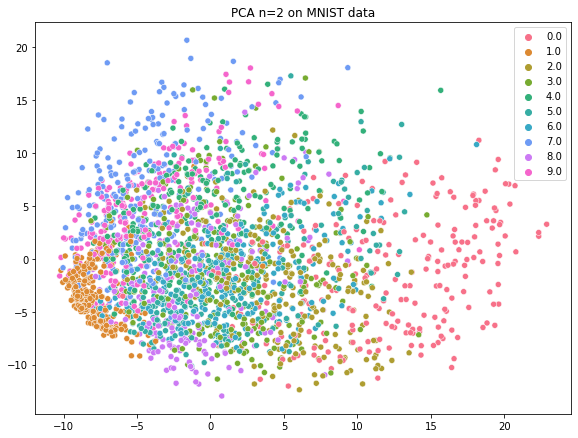

In [65]:
plt.figure(figsize=(9.6,7.2))
plot_PCA = sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue =  labels, palette = sns.color_palette("husl", 10)).get_figure()
plt.title('PCA n=2 on MNIST data')
plot_PCA.savefig("Report/Report_Plots/PCA_MNIST_plot.png")

### Isomap

In [50]:
from sklearn.manifold import Isomap

In [51]:
iso_res = Isomap(n_components=2).fit_transform(train)

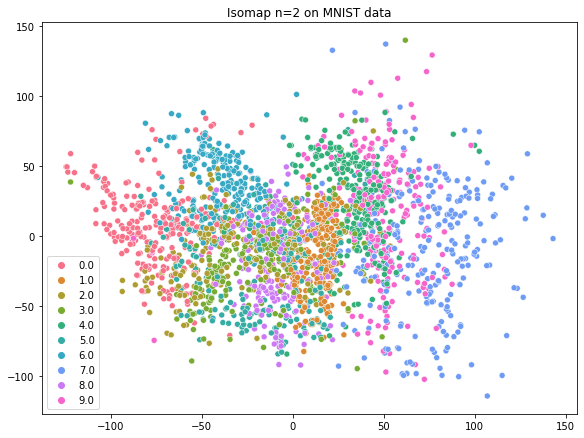

In [66]:
plt.figure(figsize=(9.6,7.2))
plot_iso = sns.scatterplot(x = iso_res[:,0], y = iso_res[:,1], hue = labels, palette = sns.color_palette("husl", 10), legend = 'full').get_figure()
plt.title('Isomap n=2 on MNIST data')
plot_iso.savefig("Report/Report_Plots/Isomap_MNIST_plot.png")



In [67]:
Iso_time = %timeit -o -r3 -n3 Isomap(n_neighbors = 10, n_components=2).fit_transform(train)

11.8 s ± 432 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### LLE: Local Linear Embedding

In [68]:
from sklearn.manifold import LocallyLinearEmbedding

In [69]:
lle_res = LocallyLinearEmbedding(n_neighbors = 10, n_components=2).fit_transform(train)

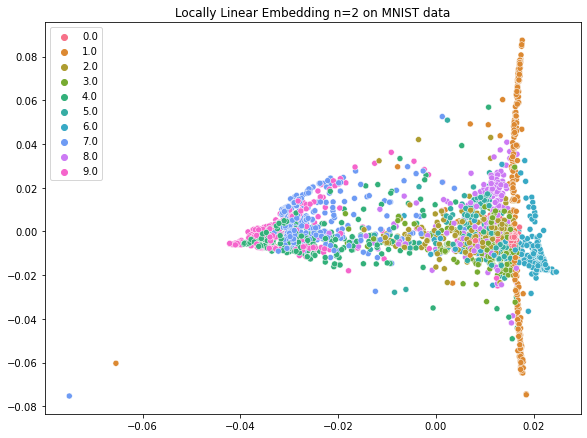

In [70]:
plt.figure(figsize=(9.6,7.2))
plot_lle = sns.scatterplot(x = lle_res[:,0], y = lle_res[:,1], hue = labels, palette = sns.color_palette("husl", 10), legend = 'full').get_figure()
plt.title('Locally Linear Embedding n=2 on MNIST data')
plot_lle.savefig("Report/Report_Plots/LLE_MNIST_plot.png")


In [71]:
lle_time = %timeit -o -r3 -n3 LocallyLinearEmbedding(n_neighbors = 10, n_components=2).fit_transform(train)

9.99 s ± 92.8 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### Neighborhood Components Analysis

In [72]:
from sklearn import neighbors


In [73]:
nca_res = neighbors.NeighborhoodComponentsAnalysis(init='random',
                                               n_components=2, random_state=0).fit_transform(train, labels)


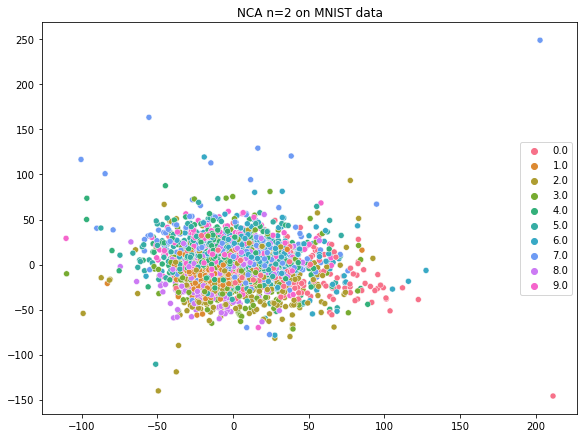

In [74]:
plt.figure(figsize=(9.6,7.2))
plot_nca = sns.scatterplot(x = nca_res[:,0], y = nca_res[:,1], hue = labels, palette = sns.color_palette("husl", 10), legend = 'full').get_figure()
plt.title('NCA n=2 on MNIST data')
plot_nca.savefig("Report/Report_Plots/NCA_MNIST_plot.png")


In [75]:
nca_time = %timeit -o -r3 -n3 neighbors.NeighborhoodComponentsAnalysis(init='random', n_components=2, random_state=0).fit_transform(train, labels)


12.1 s ± 258 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


### MDS

In [76]:
from sklearn.manifold import MDS

In [77]:
mds_res = MDS(n_components=2).fit_transform(train)

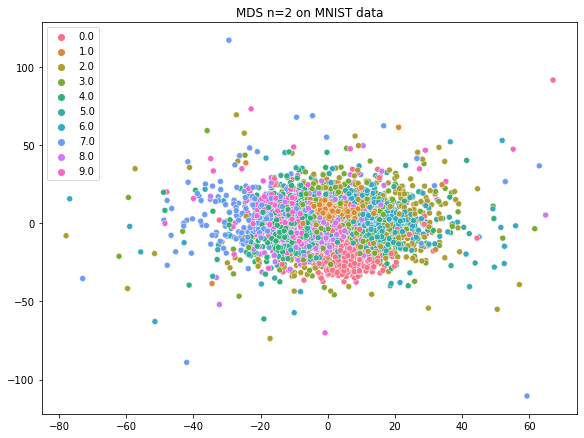

In [78]:
plt.figure(figsize=(9.6,7.2))
plot_mds = sns.scatterplot(x = mds_res[:,0], y = mds_res[:,1], hue = labels, palette = sns.color_palette("husl", 10), legend = 'full').get_figure()
plt.title('MDS n=2 on MNIST data')
plot_mds.savefig("Report/Report_Plots/MDS_MNIST_plot.png")



In [79]:
mds_time = %timeit -o -r3 -n3 MDS(n_components=2).fit_transform(train)


2min 19s ± 1.4 s per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [26]:
# speed up multiplier
# run this after you time normal with package

types = [PCA_time, lle_time, Iso_time, nca_time, mds_time, our_time]
time = list(map(lambda x: np.round(x.average,3), types))

import pandas as pd

speed_table_comp = pd.DataFrame(time, index = ['PCA', 'LLE', 'Isomap', 'NCA', 'MDS', 'our t-SNE package'], columns = ["Time Comparison (seconds)"])
speed_table_comp

,Time Comparison (seconds)
PCA,0.027
Isomap,12.414
LLE,10.472
NCA,12.423
MDS,134.326


In [27]:
speed_table_comp.to_csv("comparison_speed_table.csv")